# Orders Final

In [64]:
import setup
from circuits import * 
from number import *
import math
import pandas as pd
import sympy as sp
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [53]:
def generate_dataset(xs, k):
    p = k # dimension of vector
    m = len(xs)
    ords = np.zeros((m,p), dtype=int)
    idx = np.zeros(m) 
    
    i=0
    for x in xs:
        for j in range(1,p):
            ords[i][j] = order(j, x)
            idx[i] = x
        t+=1
        print(i)
    return (ords, idx)

def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def parity_2(x):
    if   (x==0 or x==-1):
        return 0
    x = int(np.abs(x))
    if ((x) % 2 == 1):
        return -1
    else:
        return 1

def rule_second(n):
    evenness = prime_factors(sp.totient(n)).count(2)
    if (evenness >= 4):
        return 1
    else:
        return -1
    
def _brute_kernel(x1,x2):
    return np.abs(K_ord[lookup[x1[0]]][lookup[x2[0]]])

def brute_kernel(X, Y):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            K[i][j] = _brute_kernel(X[i], Y[j])

    return K

In [133]:
ords = pd.read_csv("./data_OF/ords100.csv")

In [134]:
ords = ords.set_index("Unnamed: 0")

In [135]:
ords_p = ords.applymap(parity_2)

In [136]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [137]:
K_ord = pairwise_kernels(ords_r, ords_r)

Text(0.5, 1.0, 'Kernel matrix of dataset sorted by \ndescending parity surplus')

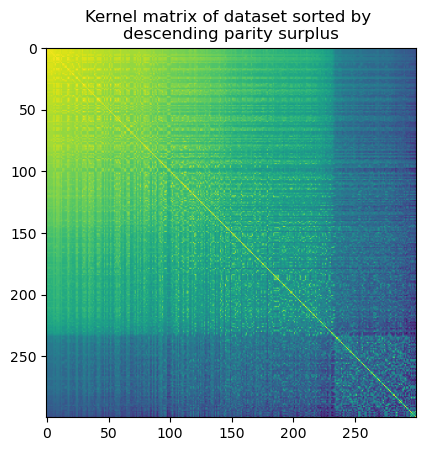

In [140]:
plt.imshow(abs(K_ord))
plt.title("Kernel matrix of dataset sorted by \ndescending parity surplus")

In [18]:
ords = ords.reindex(ords_r.index)

Text(0, 0.5, 'Number of unpaired even orders')

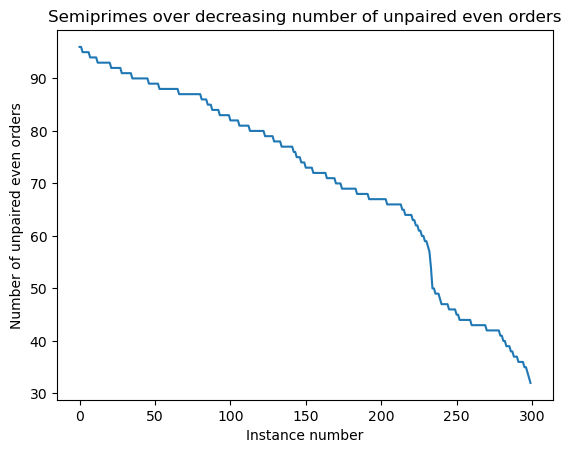

In [127]:
plt.plot(abs(ords_r.apply(sum, axis=1)).sort_values(ascending=False).values)
plt.title("Semiprimes over decreasing number of unpaired even orders")
plt.xlabel("Instance number")
plt.ylabel("Number of unpaired even orders")

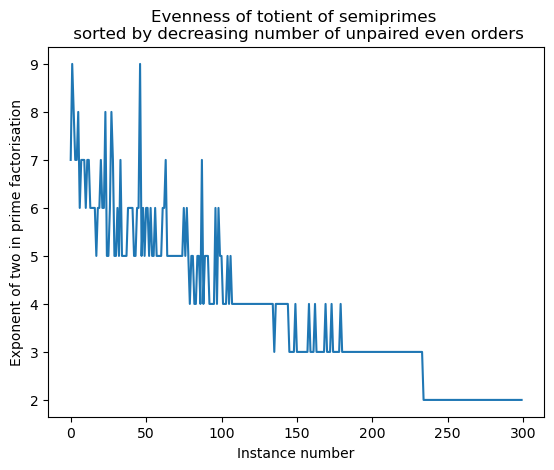

In [129]:

plt.title("Evenness of totient of semiprimes \n sorted by decreasing number of unpaired even orders")
plt.xlabel("Instance number")
plt.ylabel("Exponent of two in prime factorisation")

plt.plot([prime_factors(sp.totient(x)).count(2) for x in ords.index.values])

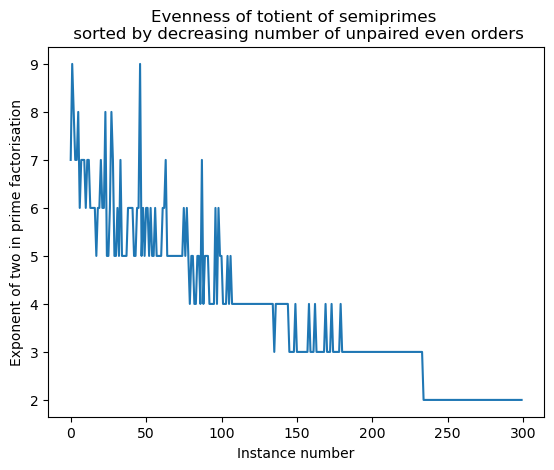

In [126]:
plt.title("Evenness of totient of semiprimes \n sorted by decreasing number of unpaired even orders")
plt.xlabel("Instance number")
plt.ylabel("Exponent of two in prime factorisation")

plt.plot([prime_factors(sp.totient(x)).count(2) for x in ords.index.values])

In [22]:
evenness = pd.read_csv("./data_OF/evenness_of_totient")

In [33]:
evenness = evenness.set_index("Unnamed: 0").values.reshape(22994)

In [34]:
np.unique(evenness, return_counts=True)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       dtype=int64),
 array([5886, 6104, 4258, 2706, 1516, 1015,  633,  490,  220,   94,   40,
          18,    9,    4,    1], dtype=int64))

Text(0.5, 1.0, 'Evenness of totient functions in range (2,1000000)')

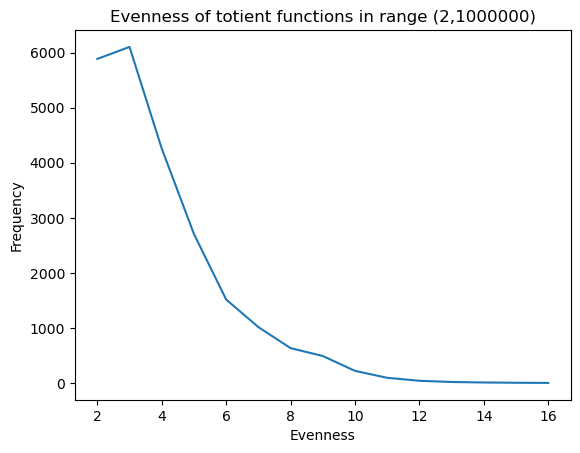

In [35]:
plt.plot(np.unique(evenness, return_counts=True)[0], np.unique(evenness, return_counts=True)[1])
plt.xlabel("Evenness")
plt.ylabel("Frequency")
plt.title("Evenness of totient functions in range (2,1000000)")

In [38]:
np.unique(evenness, return_counts=True)[1][:2].sum()

11990

In [39]:
np.unique(evenness, return_counts=True)[1][2:].sum()

11004

In [130]:
np.median(evenness) # Hence choose 3 for threshold

3.0

In [41]:
semiprimes_labels = [rule_second(x) for x in ords.index.values]

In [42]:
semiprimes_labels = np.array(semiprimes_labels)

In [43]:
args = semiprimes_labels.argsort()

In [44]:
semiprimes_labels = semiprimes_labels[args]

In [45]:
np.unique(semiprimes_labels, return_counts=True)

(array([-1,  1]), array([150, 150], dtype=int64))

In [46]:
idx_jumbled = ords.index.values[args]

In [47]:
ords_labelled = ords.reindex(idx_jumbled)

In [48]:
ords_p = ords_labelled.applymap(parity_2)

In [49]:
K_ord = pairwise_kernels(ords_p, ords_p)

Text(0.5, 1.0, 'Kernel matrix of dataset sorted by class')

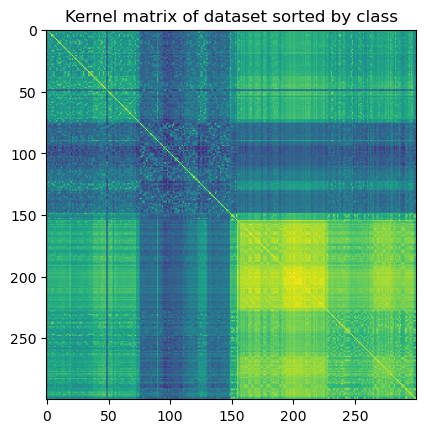

In [132]:
plt.imshow(abs(K_ord))
plt.title("Kernel matrix of dataset sorted by class")

In [51]:
lookup = dict(zip(ords_labelled.index.values,range(len(ords_labelled.index.values))))

In [57]:
scores_qke = []
for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels, test_size=0.33)

    clf = svm.SVC(kernel=brute_kernel)
    clf.fit(X_train, y_train)
    scores_qke.append(clf.score(X_test, y_test))


In [58]:
np.mean(scores_qke)

0.9828282828282827

In [59]:
np.max(scores_qke)

1.0

In [60]:
np.min(scores_qke)

0.9595959595959596

In [96]:
scores_qke = pd.read_csv("./data_OF/scores_quantum").set_index("Unnamed: 0")

In [116]:
scores_qke.columns = ["Quantum Kernel Estimator (SVM)"]

array([[<AxesSubplot:title={'center':'Quantum Kernel Estimator (SVM)'}>]],
      dtype=object)

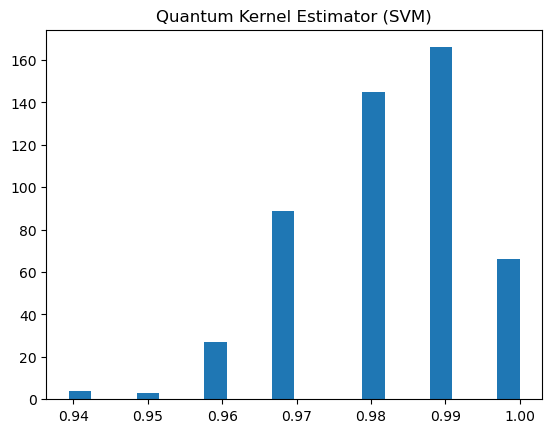

In [119]:
scores_qke.hist(bins=20, grid=False)

In [70]:
dim = 50

scores = np.zeros((4,dim))

for i in range(dim):

    X_train, X_test, y_train, y_test = train_test_split(ords_labelled.index.values.reshape(-1,1), semiprimes_labels, test_size=0.33)

    # Linear SVC
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=0, tol=1e-5))
    clf.fit(X_train, y_train)
    scores[0][i] = clf.score(X_test, y_test)
    
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    scores[1][i] = clf.score(X_test, y_test)
    
    clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
    scores[2][i] = clf.score(X_test, y_test)
    

    clf = RandomForestClassifier(max_depth=200, random_state=0)
    clf.fit(X_train, y_train)

    scores[3][i] = clf.score(X_test, y_test)

In [ ]:
pd.DataFrame(scores).apply(np.mean, axis=1)

Unnamed: 0
0    0.522040
1    0.497919
2    0.497091
3    0.461960
dtype: float64

In [80]:
pd.DataFrame(scores).apply(np.max, axis=1)

Unnamed: 0
0    0.646465
1    0.616162
2    0.616162
3    0.585859
dtype: float64

In [81]:
pd.DataFrame(scores).apply(np.min, axis=1)

Unnamed: 0
0    0.383838
1    0.383838
2    0.383838
3    0.343434
dtype: float64

In [84]:
pd.DataFrame(scores).apply(np.std, axis=1)

Unnamed: 0
0    0.041101
1    0.038399
2    0.038674
3    0.042959
dtype: float64

In [77]:
scores = pd.read_csv("./data_OF/scores_classical").set_index("Unnamed: 0")

In [105]:
scores = scores.T

In [109]:
scores.columns = ["Linear SVM", "Logistic Regression", "Neural Network", "Random Forest"]

array([[<AxesSubplot:title={'center':'Linear SVM'}>,
        <AxesSubplot:title={'center':'Logistic Regression'}>],
       [<AxesSubplot:title={'center':'Neural Network'}>,
        <AxesSubplot:title={'center':'Random Forest'}>]], dtype=object)

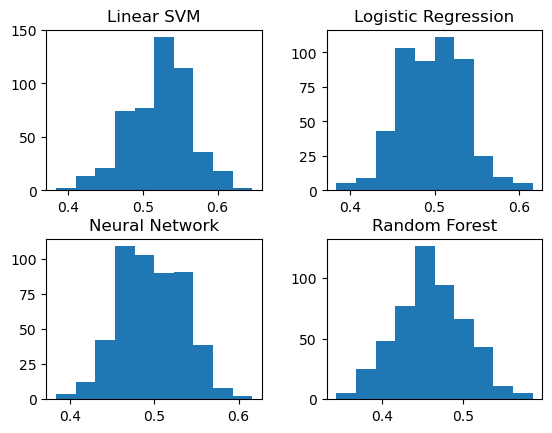

In [120]:
scores.hist(grid=False)

In [144]:
scores.hist?

Signature:
scores.hist(
    column: Union[Hashable, NoneType, Sequence[Union[Hashable, NoneType]]] = None,
    by=None,
    grid: bool = True,
    xlabelsize: Union[int, NoneType] = None,
    xrot: Union[float, NoneType] = None,
    ylabelsize: Union[int, NoneType] = None,
    yrot: Union[float, NoneType] = None,
    ax=None,
    sharex: bool = False,
    sharey: bool = False,
    figsize: Union[Tuple[int, int], NoneType] = None,
    layout: Union[Tuple[int, int], NoneType] = None,
    bins: Union[int, Sequence[int]] = 10,
    backend: Union[str, NoneType] = None,
    legend: bool = False,
    **kwargs,
)
Docstring:
Make a histogram of the DataFrame's.

A `histogram`_ is a representation of the distribution of data.
This function calls :meth:`matplotlib.pyplot.hist`, on each series in
the DataFrame, resulting in one histogram per column.

.. _histogram: https://en.wikipedia.org/wiki/Histogram

Parameters
----------
data : DataFrame
    The pandas object holding the data.
column : str o

array([[<AxesSubplot:title={'center':'Linear SVM'}>,
        <AxesSubplot:title={'center':'Logistic Regression'}>],
       [<AxesSubplot:title={'center':'Neural Network'}>,
        <AxesSubplot:title={'center':'Random Forest'}>]], dtype=object)

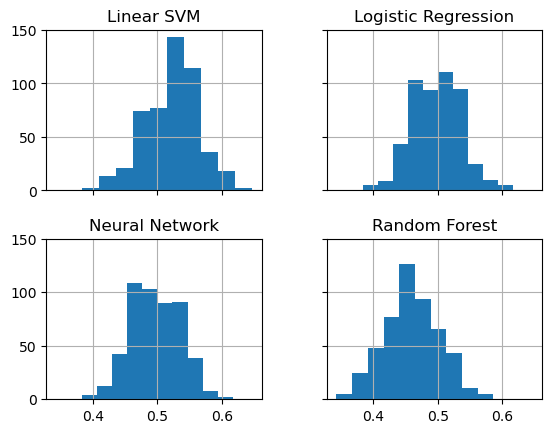

In [143]:
scores.hist(sharex=True, sharey=True)

0      0.474747
1      0.545455
2      0.505051
3      0.545455
4      0.505051
         ...   
495    0.474747
496    0.535354
497    0.515152
498    0.545455
499    0.585859
Name: Linear SVM, Length: 500, dtype: float64

In [153]:
scores_qke.columns

Index(['Quantum Kernel Estimator (SVM)'], dtype='object')

Text(0, 0.5, 'Frequency')

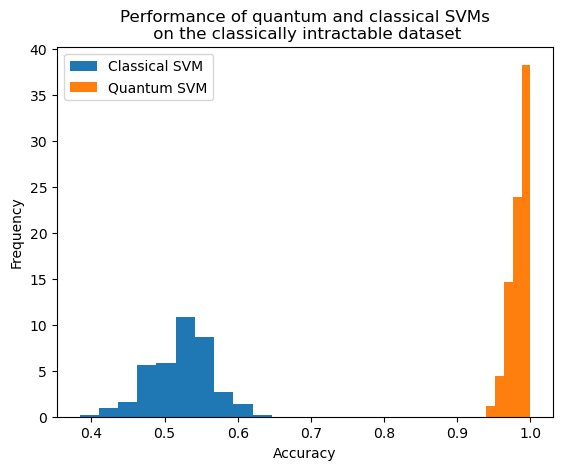

In [174]:
plt.hist(scores["Linear SVM"], label="Classical SVM", density=True)
plt.hist(scores_qke["Quantum Kernel Estimator (SVM)"], label="Quantum SVM", bins=5, density=True)
plt.legend()
plt.title("Performance of quantum and classical SVMs\n on the classically intractable dataset")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")